# Turtle Review - Predictions with Regression

## Importing and Reviewing the Data

In [2]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [3]:
# load turtle reviews csv to reviews dataframe
reviews = pd.read_csv('turtle_reviews.csv')

# validate the file has loaded correctly
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [4]:
# check the info of all columns and validate no null values
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# check the statistics for all number columns
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## Manipulate the Turtle Data


In [6]:
# copy the original dataframe
new_reviews = reviews.copy()

# drop the language and platform columns
new_reviews.drop(['language', 'platform'], axis=1)

#rename the long columns to more user friendly output
new_reviews.rename(columns = {'remuneration (k£)':'salary_000k', 'spending_score (1-100)':'score'}, inplace=True)


In [7]:
# validate the change
new_reviews.head()

,gender,age,salary_000k,score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [8]:
# export the new table to new turtle review csv file
new_reviews.to_csv('new_turtle_reviews.csv')

In [9]:
# load the new CSV file to a new dataframe - turtle csv
turtle_csv = pd.read_csv('new_turtle_reviews.csv')

#validate the number of records and shape of the new frame
print(turtle_csv.shape)
turtle_csv.head()


(2000, 12)


,Unnamed: 0,gender,age,salary_000k,score,loyalty_points,education,language,platform,product,review,summary
0,0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


## Model and create predicted data

### Loyalty Points vs Salary

Text(0, 0.5, 'loyalty points')

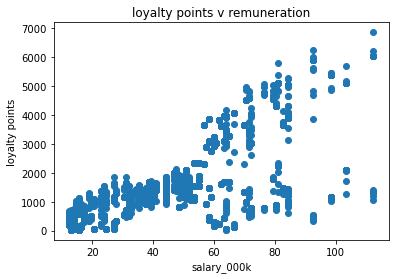

In [10]:
# reshape and assign the x and y variables for graph plot
y = turtle_csv['loyalty_points'].values.reshape(-1,1)
x = turtle_csv['salary_000k'].values.reshape(-1,1)

# create a scatter plot of loyalty points v salary
plt.clf()
plt.scatter(x,y)
plt.title('loyalty points v remuneration')

#assign the labels to x and y axis
plt.xlabel('salary_000k')
plt.ylabel('loyalty points')

In [11]:
# create the ols model of the independent and dependent variables
f = 'y ~ x'
test = ols(f,data = turtle_csv).fit()

# view the output of the model
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        21:03:01   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# print out the required parameters, standard error and predicted values from the test
print("Parameters:", test.params)

print("Standard Errors: ", test.bse)

print("Predicted values: ", test.predict())

Parameters: Intercept   -65.686513
x            34.187825
dtype: float64
Standard Errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [13]:
# create the predicted values using the x coefficient * x value + intercept
y_pred = 34.1878 * x - 65.6865

#display the predicted y values based on the x input
y_pred

array([[ 354.82344 ],
       [ 354.82344 ],
       [ 382.857436],
       ...,
       [3102.155048],
       [3298.39302 ],
       [3102.155048]])

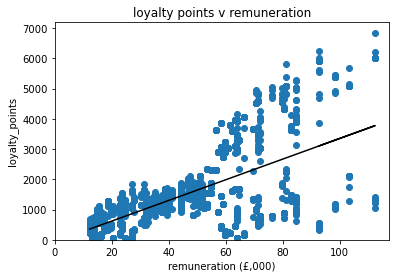

In [14]:
# import the matplotlib library
import matplotlib.pyplot as plt

plt.clf()

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black) using the predicted values from the model.
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title('loyalty points v remuneration')

plt.xlabel('remuneration (£,000)')
plt.ylabel('loyalty_points')
plt.show()

### Loyalty Points vs Spending Score

Text(0, 0.5, 'loyalty points')

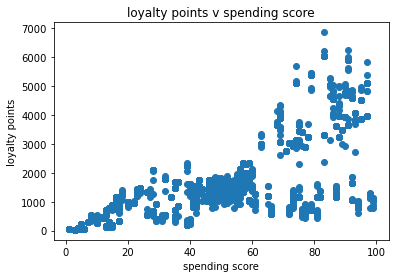

In [15]:
y = turtle_csv['loyalty_points'].values.reshape(-1,1)
x = turtle_csv['score'].values.reshape(-1,1)

plt.clf()
plt.scatter(x,y)

plt.title('loyalty points v spending score')

plt.xlabel('spending score')
plt.ylabel('loyalty points')

In [16]:
f = 'y ~ x'
test = ols(f,data = turtle_csv).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        21:03:02   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
print("Parameters:", test.params)

print("Standard Errors: ", test.bse)

print("Predicted values: ", test.predict())

Parameters: Intercept   -75.052663
x            33.061693
dtype: float64
Standard Errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [18]:
y_pred = 33.0617 * x - 75.0527

y_pred

array([[1214.3536],
       [2602.945 ],
       [ 123.3175],
       ...,
       [2933.562 ],
       [ 453.9345],
       [ 189.4409]])

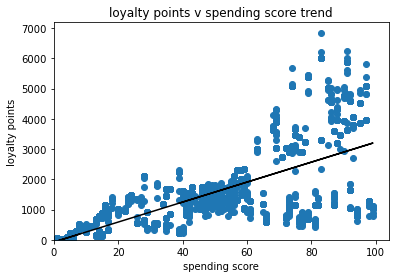

In [19]:
import matplotlib.pyplot as plt

plt.clf()
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title('loyalty points v spending score trend')

plt.xlabel('spending score')
plt.ylabel('loyalty points')
plt.show()

### Loyalty Points vs Age

Text(0, 0.5, 'loyalty points')

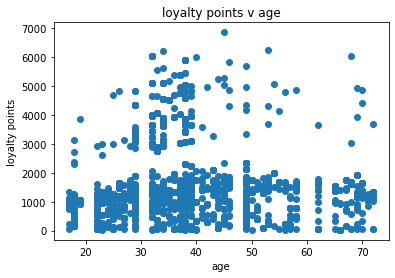

In [20]:
y = turtle_csv['loyalty_points'].values.reshape(-1,1)
x = turtle_csv['age'].values.reshape(-1,1)

plt.scatter(x,y)

plt.title('loyalty points v age')
plt.xlabel('age')
plt.ylabel('loyalty points')

In [21]:
f = 'y ~ x'
test = ols(f,data = turtle_csv).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 07 Sep 2022   Prob (F-statistic):             0.0577
Time:                        21:03:03   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
print("Parameters:", test.params)

print("Standard Errors: ", test.bse)

print("Predicted values: ", test.predict())

Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard Errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [23]:
y_pred = -4.0128 * x + 1736.5177

y_pred

array([[1664.2873],
       [1644.2233],
       [1648.2361],
       ...,
       [1600.0825],
       [1600.0825],
       [1608.1081]])

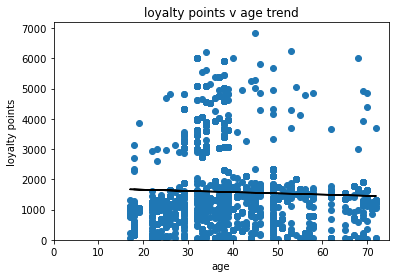

In [24]:
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.title('loyalty points v age trend')

plt.xlabel('age')
plt.ylabel('loyalty points')

plt.show()

# Predictions and Clustering

## Data preparation and plot

In [25]:
# create a new dataframe using the salary and score columns from the turtle csv file
df2 = turtle_csv[['salary_000k', 'score']]

In [26]:
# show the information of the new dataframe and print the head of the dataframe
print(df2.info())
df2.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary_000k  2000 non-null   float64
 1   score        2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


,salary_000k,score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


Text(0, 0.5, 'remuneration')

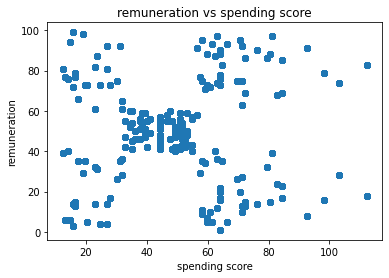

In [27]:
#plot the salary vs score on a scatter plot to identify any clusters
plt.scatter(x='salary_000k', y = 'score', data = df2)

plt.title('remuneration vs spending score')
plt.xlabel('spending score')
plt.ylabel('remuneration')

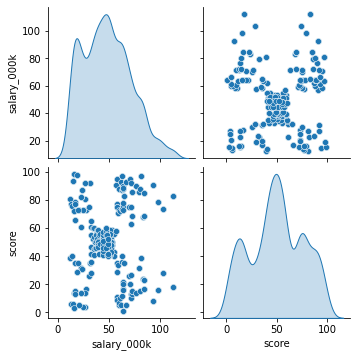

In [28]:
# import the seaborn library and plot the df2 on a pairplot
import seaborn as sns

sns.pairplot(df2, diag_kind = 'kde')

### Elbow and Silhouette Methods

Text(0, 0.5, 'Remuneration')

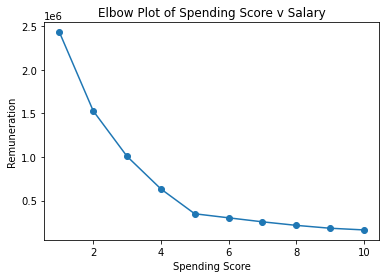

In [29]:
# import KMeans for Elbow Method
from sklearn.cluster import KMeans

# create a new empty list
cs = []

# identify the optimum number of clusters using default iterations and n_init numbers and kmeans++ algorithm
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    
    # fit the kmeans with the new df2 dataframe
    kmeans.fit(df2)
    
    # append the interia measurement to the cs list - describes how well the dataset was clustered by Kmeans
    # (distance between each data point and the centroid)
    cs.append(kmeans.inertia_)


# Elbow plot the iterations and cs list using the marker of o
plt.plot(range(1,11), cs, marker='o')
plt.title('Elbow Plot of Spending Score v Salary')
plt.xlabel("Spending Score")
plt.ylabel("Remuneration")

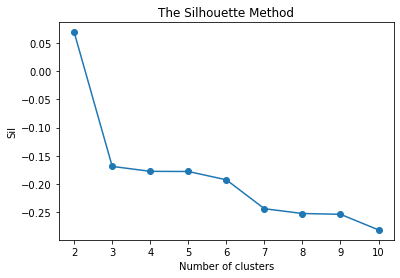

In [30]:
# import Silhouette for the Silhouette method
from sklearn.metrics import silhouette_score

# create new silhouette list
sil = []
# set maximum number to be plotted
kmax=10

# create new kmeans loop and fit the data again to the df2 dataframe
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    
    # use euclidean metric to measure the distance between the objects
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# plot the sil list against the kmeans loops
plt.plot(range(2,kmax+1), sil, marker = 'o')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.show()
    

/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/2075758845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['K-Means Predicted'] = clusters


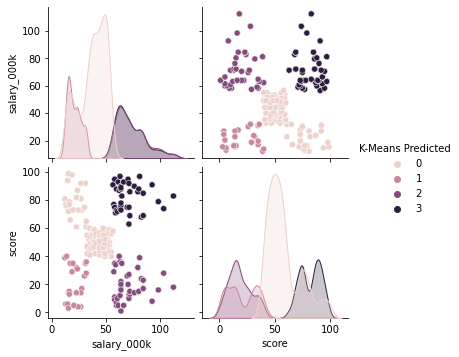

In [31]:
# evaluate the cluster model with 4 clusters
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(df2)

# labels_ used to identify the clusters
clusters = kmeans.labels_

# predicted values column in df2 dataframe allocated the cluster
df2['K-Means Predicted'] = clusters

# Plot the predicted values
sns.pairplot(df2, hue='K-Means Predicted', diag_kind= 'kde')

In [32]:
df2['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

### Cluster prediction

/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/3153557338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['K-Means Predicted'] = clusters


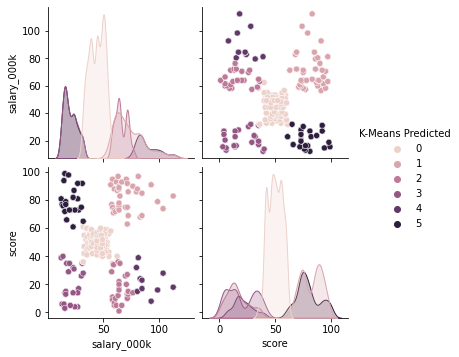

In [33]:
# final repeat with 6 clusters
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind= 'kde')

In [34]:
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/1753958435.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['K-Means Predicted'] = clusters


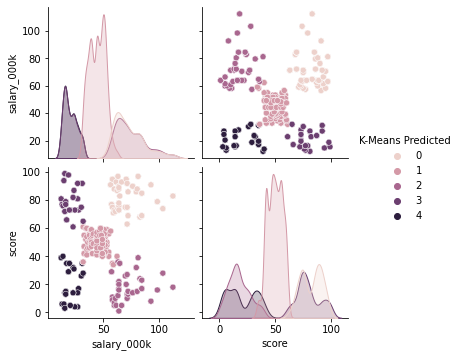

In [35]:
# evaluate the cluster model with 5 clusters
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(df2)

# labels used to identify the clusters
clusters = kmeans.labels_

# predicted values used to identify the clusters
df2['K-Means Predicted'] = clusters

# Plot the predicted clusters
sns.pairplot(df2, hue='K-Means Predicted', diag_kind= 'kde')

In [36]:
df2['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

In [37]:
print(df2.head())

   salary_000k  score  K-Means Predicted
0        12.30     39                  4
1        12.30     81                  3
2        13.12      6                  4
3        13.12     77                  3
4        13.94     40                  4


<AxesSubplot:xlabel='salary_000k', ylabel='score'>

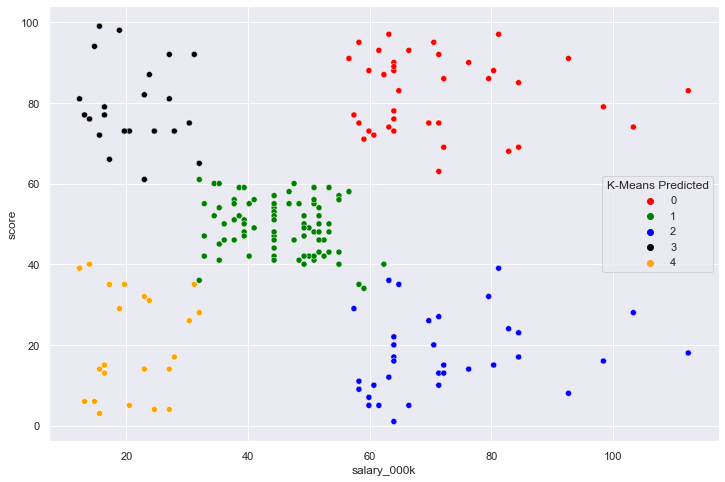

In [38]:
# visualise the clusters
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='salary_000k' , 
                y ='score',
                data=df2 , hue='K-Means Predicted', palette=['red','green','blue', 'black', 'orange'])

Part 3

# Sentiment Analysis

In [89]:
# create new turtle review table with only Review and Summary columns
new_turtle = turtle_csv[['review', 'summary']]

In [90]:
# view the table
new_turtle.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [91]:
# Check the new table for null values
new_turtle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [92]:
# change the values in review to lower case
new_turtle['review']= new_turtle['review'].apply(lambda x:" ".join(x.lower() for x in x.split()))

# change the values in summary to lower case
new_turtle['summary'] = new_turtle['summary'].apply(lambda x:" ".join(x.lower() for x in x.split()))


/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/2671028139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['review']= new_turtle['review'].apply(lambda x:" ".join(x.lower() for x in x.split()))
/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/2671028139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['summary'] = new_turtle['summary'].apply(lambda x:" ".join(x.lower() for x in x.split()))


In [93]:
# review the head of the updated dataframe - validate all lower case

new_turtle.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [94]:
# remove any punctuation from both columns
new_turtle['review'] = new_turtle['review'].str.replace("[^\w\s]",'')

new_turtle['summary'] = new_turtle['summary'].str.replace("[^\w\s]",'')

new_turtle.head()

/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/4183170539.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_turtle['review'] = new_turtle['review'].str.replace("[^\w\s]",'')
/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/4183170539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['review'] = new_turtle['review'].str.replace("[^\w\s]",'')
/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/4183170539.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new_turtle['summary'] = new_turtle['summary'].str.replace("[^\w\s]",'')
/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_9

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [95]:
print(new_turtle.review.duplicated().sum())

print(new_turtle.summary.duplicated().sum())

50
649


In [96]:
# drop any duplicate values from the dataframe
print(new_turtle.shape)
new_turtle.drop_duplicates(subset = ['review'], inplace=True)
print(new_turtle.shape)

new_turtle.drop_duplicates(subset = ['summary'], inplace = True)

new_turtle.reset_index(inplace=True)
print(new_turtle.shape)

print(new_turtle.head())


(2000, 2)
(1950, 2)
(1349, 3)
   index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap  


/Users/mattrose/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [97]:
# copy the dataframe
new_turtle_tokenize = new_turtle.copy()


In [98]:
new_turtle_tokenize.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [99]:
ntt_comments = ''

# iterate through number of rows in data frame for review column
for i in range(new_turtle.shape[0]):
    ntt_comments = ntt_comments + new_turtle['review'][i]
    ntt_comments = ntt_comments + new_turtle['summary'][i]

In [100]:
# install the wordcloud, matplotlib and seaborn libraries
!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
# generate an unfiltered wordcloud for a combination of review and summary columns
sns.set(color_codes=True)

word_cloud_review = WordCloud(width=1600, height=900,
                      background_color='white',
                      colormap='plasma',
                      stopwords='none',
                      min_font_size=10).generate(ntt_comments)

word_cloud_review

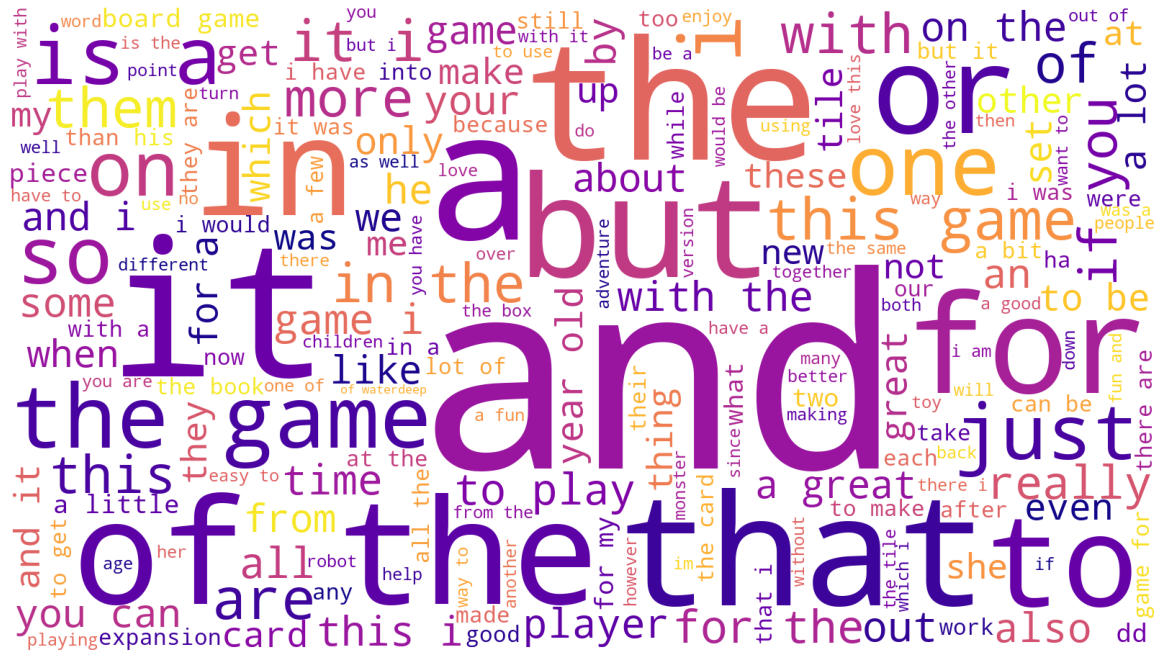

In [102]:
# display the wordcloud
plt.figure(figsize = (16,9), facecolor=None)
plt.imshow(word_cloud_review)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [103]:
# install nltk library
!pip install nltk
import nltk

nltk.download('punkt')
from nltk.tokenize import sent_tokenize

from nltk.tokenize import word_tokenize

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/mattrose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattrose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
# tokenize the data within the dataframe columns
new_turtle_tokenize['review_tokens'] = new_turtle_tokenize['review'].apply(word_tokenize)

new_turtle_tokenize['summary_tokens'] = new_turtle_tokenize['summary'].apply(word_tokenize)

new_turtle_tokenize.head()

,index,review,summary,review_tokens,summary_tokens
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [105]:
# combine the review and summary tokenised words to the all_tokens list.
all_tokens = []

for i in range(new_turtle_tokenize.shape[0]):
    all_tokens = all_tokens + new_turtle_tokenize['review_tokens'][i]
    all_tokens = all_tokens + new_turtle_tokenize['summary_tokens'][i]


In [106]:
# import the FreqDist library and calculate the frequency of all of the words in the all_tokens list
from nltk.probability import FreqDist
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 5276, 'and': 3102, 'a': 3067, 'to': 3035, 'of': 2392, 'i': 1970, 'it': 1969, 'is': 1696, 'this': 1674, 'game': 1627, ...})

In [107]:
# work through all_tokens and add a word to the tokens1 attribute
tokens1 = [word for word in all_tokens if word.isalnum()]

In [108]:
# install nltk library
!pip install nltk
import nltk

nltk.download('punkt')
from nltk.tokenize import sent_tokenize

from nltk.tokenize import word_tokenize

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/mattrose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattrose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
# create a list of the stop words from the english corpus
stop_words = set(stopwords.words('english'))

print(stop_words)

{"isn't", 'between', 'should', 'his', 'my', 'you', "you'll", 'only', 'your', "shouldn't", 'once', 't', 'for', 'hers', 'their', "it's", "hasn't", "don't", 'than', 'don', 'because', 'this', 'ours', 'up', 'few', 'against', 'will', 'himself', "she's", 'on', 'its', "hadn't", "wasn't", 'how', 'who', 'we', 'very', 'to', 'out', 'hadn', 'wasn', 'nor', 'these', 'they', 'off', 'why', 'it', 'been', 'did', 'of', 'after', 'about', "should've", 'mightn', 'wouldn', 'too', 'each', 'have', 'being', 'then', 'both', 'any', 'other', "couldn't", 'y', "weren't", 's', 'our', 'so', 'yourself', 'below', "didn't", 'won', 'was', "you've", 'yourselves', 'doesn', "shan't", 'll', 'through', 'with', 'under', 'that', "aren't", 'most', 'shan', 'before', 'couldn', 'just', 'hasn', 'aren', 'does', 'a', 'she', 'whom', 'or', 'from', 'which', 'if', 'o', "you're", 'theirs', 'as', 'what', 've', 'haven', "haven't", 'isn', 'no', "that'll", "you'd", "needn't", 'has', 'those', 'me', 'weren', 'own', 'is', 'over', 'were', 'i', 'm', 

In [110]:
# iterate through the tokens1 list and add the words to the tokens2 list if the word isn't in the stop words list
tokens2 = [x for x in tokens1 if x.lower() not in stop_words]

tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

In [111]:
# create the world cloud and call the tokens2_string containing all of the words without the stopwords
sns.set(color_codes=True)

word_cloud_summary_2 = WordCloud(width=1600, height=900,
                      background_color='white',
                      colormap='plasma',
                      stopwords='none',
                      min_font_size=10).generate(tokens2_string)

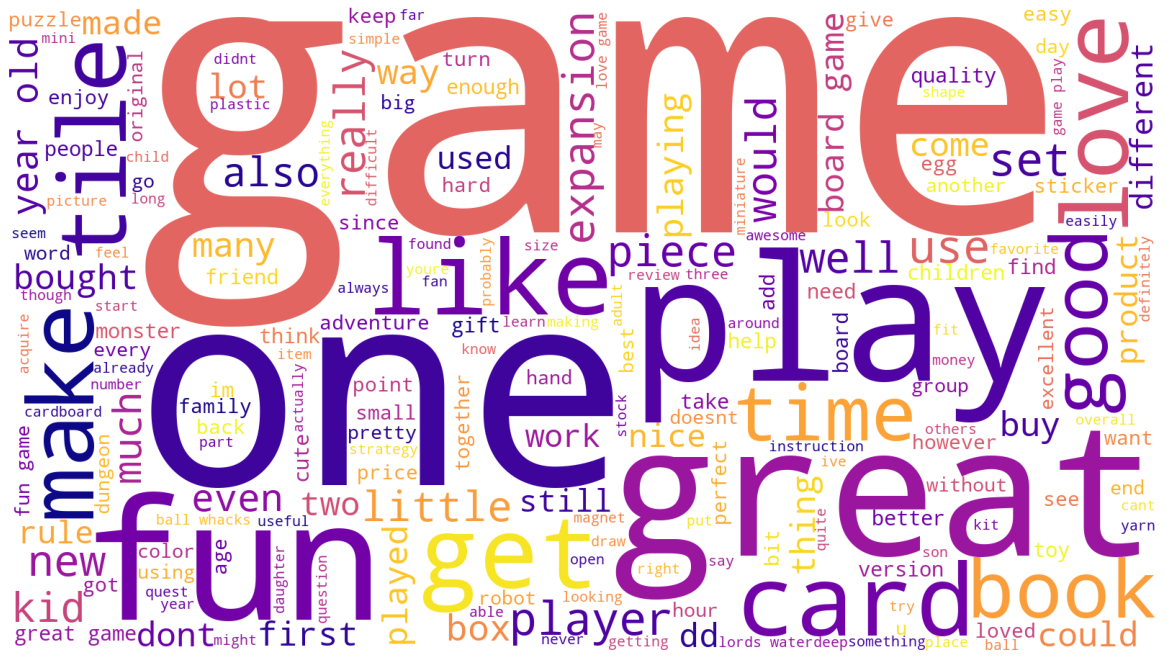

In [112]:
# display the word cloud and call the word cloud summary
plt.figure(figsize = (16,9), facecolor=None)
plt.imshow(word_cloud_summary_2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [113]:
# import the Counter and identify the top 15 most common words used from the combined word list 
# without the stop words
from collections import Counter

counts = pd.DataFrame(Counter(tokens2).most_common(15),
                     columns=['Word', 'Frequency']).set_index('Word')

counts

,Frequency
Word,
game,1627
great,627
fun,582
one,503
play,468
like,427
good,312
really,308
get,307


In [134]:
# generate the polarity for all of the values in the review column
def generate_polarity(comment):
    return(TextBlob(comment).sentiment[0])

new_turtle['review_polarity'] = new_turtle['review'].apply(generate_polarity)

new_turtle['review_polarity'].head()



/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/652028572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['review_polarity'] = new_turtle['review'].apply(generate_polarity)


0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

In [135]:
# generate the subjectivity value for the strings in the 'review' column
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

new_turtle['review_subjectivity'] = new_turtle['review'].apply(generate_subjectivity)

new_turtle['review_subjectivity'].head()

/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/461392577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['review_subjectivity'] = new_turtle['review'].apply(generate_subjectivity)


0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: review_subjectivity, dtype: float64

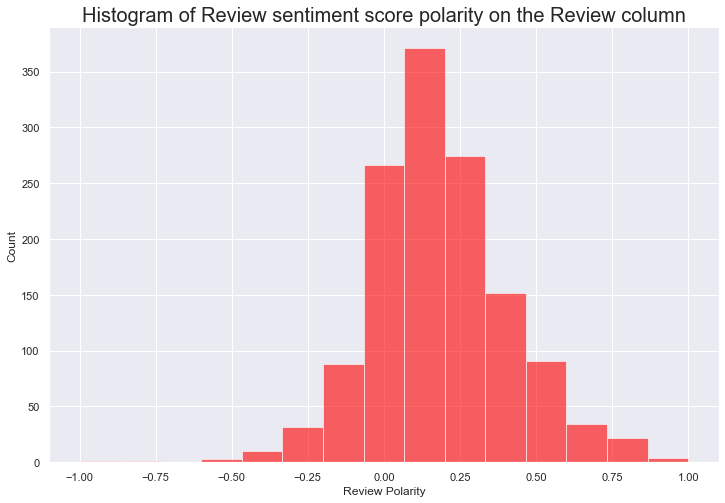

In [120]:
# plot the polarity sentiment on a histogram using 15 bins
num_bins = 15

n,bins, patches = plt.hist(new_turtle['review_polarity'], num_bins, facecolor='red', alpha = 0.6)

plt.xlabel('Review Polarity', fontsize=12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of Review sentiment score polarity on the Review column', fontsize=20)
plt.show()

In [136]:
# generate the polarity of the strings in the summary column
def generate_polarity(comment):
    return(TextBlob(comment).sentiment[0])

new_turtle['summary_polarity'] = new_turtle['summary'].apply(generate_polarity)

new_turtle['summary_polarity'].head()


/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/4011370598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['summary_polarity'] = new_turtle['summary'].apply(generate_polarity)


0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

In [138]:
# generate the subjectivity of the strings in the summary column
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

new_turtle['summary_subjectivity'] = new_turtle['summary'].apply(generate_subjectivity)

new_turtle['summary_subjectivity'].head()

/var/folders/ln/xk0l9f_s17g4dv8vks89pbjc0000gn/T/ipykernel_96119/1693954050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_turtle['summary_subjectivity'] = new_turtle['summary'].apply(generate_subjectivity)


0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectivity, dtype: float64

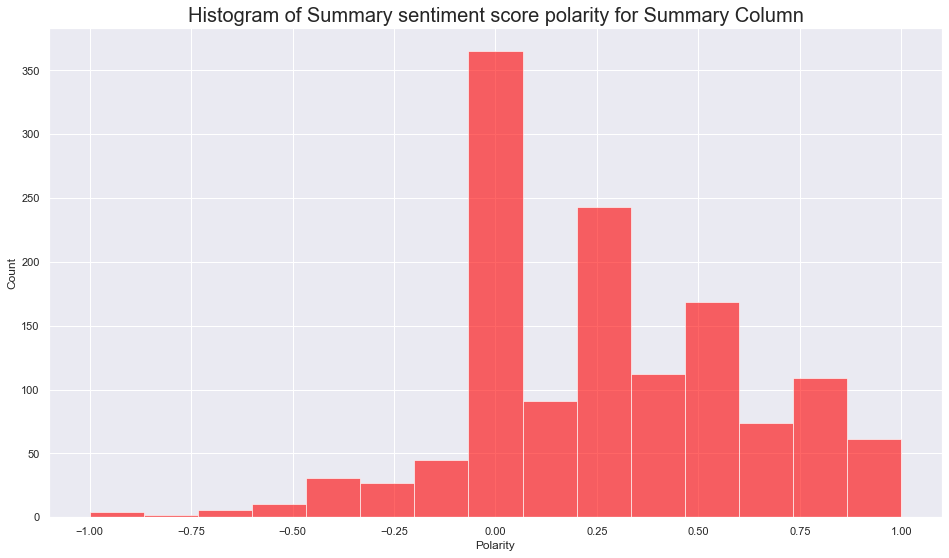

In [123]:
# plot the summary sentiment on a histogram
num_bins = 15

plt.figure(figsize=(16,9))

n,bins, patches = plt.hist(new_turtle['summary_polarity'], num_bins, facecolor='red', alpha = 0.6)

plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of Summary sentiment score polarity for Summary Column', fontsize=20)
plt.show()

In [131]:
# identify the top 20 highest sentiment scores and their review
positive_sentiment = new_turtle.nlargest(20,'review_polarity')

positive_sentiment = positive_sentiment[['review', 'review_polarity', 'review_subjectivity']]

positive_sentiment.style.set_properties(subset=['review'], **{'width':'1200px'})

,review,review_polarity,review_subjectivity
564,perfect,1.000000,1.000000
1080,my daughter loves her stickers awesome seller thank you,1.000000,1.000000
1334,perfect for tutoring my grandson in spelling,1.000000,1.000000
890,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,0.880000,0.860000
498,great quality very cute and perfect for my toddler,0.816667,0.916667
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons,0.800000,0.750000
336,great seller happy with my purchase 5 starrrr,0.800000,0.875000
439,great easter gift for kids,0.800000,0.750000
491,these are great,0.800000,0.750000
692,bought this because i wanted it all these dd games are great,0.800000,0.750000


In [132]:
# identify the lowest 20 sentiment scores from the review column
negative_sentiment = new_turtle.nsmallest(20,'review_polarity')

negative_sentiment = negative_sentiment[['review', 'review_polarity', 'review_subjectivity']]

negative_sentiment.style.set_properties(subset=['review'], **{'width':'1200px'})

,review,review_polarity,review_subjectivity
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
147,incomplete kit very disappointing,-0.780000,0.910000
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000,0.300000
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000,0.900000
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,-0.491667,0.433333
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,-0.446250,0.533750
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,-0.440741,0.485185
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,-0.400000,0.400000
355,my son loves playing this game it was recommended by a counselor at school that works with him,-0.400000,0.400000
713,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,-0.400000,0.400000
